In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sys import platform

# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10, "lines.markersize": 30})

# sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

sns.set("notebook", font_scale=1.3, rc={'figure.figsize':(15,10), 'xtick.labelsize': 15, 'ytick.labelsize': 15, 'font.size': 15}, style='whitegrid')

In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/krista/'

In [3]:
write_dir=home+'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/'

In [4]:
obs_df = pd.read_csv(home+'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/cleaned_probC_obs_data.csv')
learning_signals = pd.read_csv(home+'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/probC_sim_learning_signals_hyp.csv')

In [5]:
obs_df.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,low_val_cue,obs_accuracy,reward,cumulative_reward,iti,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112
0,776,volatility,lv,0,0,1.0,0.0,1,0.554065,1.0,...,111.0,1.0,3.0,602.0,0.315112,1.863330,1.0,0,34,0.911765
1,776,volatility,lv,1,1,0.0,0.0,1,0.422159,0.0,...,111.0,1.0,5.0,606.0,0.320283,1.721799,1.0,1,34,0.911765
2,776,volatility,lv,2,2,0.0,0.0,1,0.310826,0.0,...,111.0,1.0,1.0,606.0,0.704584,2.001336,1.0,2,34,0.911765
3,776,volatility,lv,3,3,0.0,1.0,1,0.256866,0.0,...,112.0,0.0,0.0,605.0,0.503199,1.748328,1.0,3,34,0.911765
4,776,volatility,lv,4,4,0.0,1.0,1,0.229932,0.0,...,111.0,1.0,2.0,606.0,0.376770,1.606700,1.0,4,34,0.911765


In [6]:
learning_signals.head()

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,cond,id_choices,correct_id_choices,b_t0,b_t1,r_t1,r_t2,obs_cp,alpha
0,0.025334,0.000000,0.000000,0,0.010000,0.100000,0.437,False,0,761,lc,0,1,0.000000,0.000000,0.000000,3.050408,0,0.512667
1,0.037253,0.000000,0.000000,0,0.010000,0.125334,0.401,True,0,761,lc,1,1,0.000000,0.038001,0.000000,1.313202,0,0.363543
2,0.021226,0.038001,0.038001,0,0.010000,0.137253,0.713,False,0,761,lc,0,1,0.055879,0.501592,0.000000,2.605880,0,0.295355
3,0.020502,0.445713,-0.445713,0,0.048001,0.121226,0.679,False,0,761,lc,0,1,0.039375,0.522784,0.000000,3.740468,0,0.243858
4,0.022556,0.483409,-0.483409,0,0.493714,0.120502,0.384,True,0,761,lc,1,1,0.029773,0.542819,3.329545,0.000000,1,0.214195


In [7]:
n_clean_trials = 600
n_participants = 24 
n_conditions = 4
df_len = n_clean_trials*n_participants*n_conditions

In [8]:
learning_signals['trial'] = np.tile(range(0,n_clean_trials), n_participants*n_conditions)
learning_signals.head()

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,acc,subj_idx,ID,cond,id_choices,correct_id_choices,b_t0,b_t1,r_t1,r_t2,obs_cp,alpha,trial
0,0.025334,0.000000,0.000000,0,0.010000,0.100000,0.437,False,0,761,lc,0,1,0.000000,0.000000,0.000000,3.050408,0,0.512667,0
1,0.037253,0.000000,0.000000,0,0.010000,0.125334,0.401,True,0,761,lc,1,1,0.000000,0.038001,0.000000,1.313202,0,0.363543,1
2,0.021226,0.038001,0.038001,0,0.010000,0.137253,0.713,False,0,761,lc,0,1,0.055879,0.501592,0.000000,2.605880,0,0.295355,2
3,0.020502,0.445713,-0.445713,0,0.048001,0.121226,0.679,False,0,761,lc,0,1,0.039375,0.522784,0.000000,3.740468,0,0.243858,3
4,0.022556,0.483409,-0.483409,0,0.493714,0.120502,0.384,True,0,761,lc,1,1,0.029773,0.542819,3.329545,0.000000,1,0.214195,4


In [9]:
learning_signals.columns = learning_signals.columns.str.strip()
obs_df.columns = obs_df.columns.str.strip()

In [10]:
learning_signals = learning_signals.rename(index=str, columns={"cond": "condition", "acc": "p_id_accuracy"})
learning_signals['p_id_accuracy']=learning_signals.p_id_accuracy*1
learning_signals['flipped_gen_drift'] = learning_signals.gen_drift

learning_signals.loc[learning_signals.p_id_accuracy == 1,'flipped_gen_drift'] = abs(learning_signals.loc[learning_signals.p_id_accuracy==1].flipped_gen_drift)

In [11]:
learning_signals.loc[learning_signals.trial == 0, 'cp'] = 1

In [12]:
# plt.figure(figsize=(10,8))
# plt.plot(learning_signals.cpp[learning_signals.condition == 'hv'][0:600])
# plt.show()
# plt.figure(figsize=(10,8))
# plt.plot(learning_signals.cpp[learning_signals.condition == 'lv'][0:600])

In [13]:
learning_signals_sorted = learning_signals.sort_values(['ID', 'condition', 'trial'], axis=0, ascending=True)
obs_df_sorted = obs_df.sort_values(['ID', 'condition', 'trial'], axis=0, ascending=True)

In [14]:
learning_signals_sorted = learning_signals_sorted.reset_index(drop=True);
obs_df_sorted = obs_df_sorted.reset_index(drop=True);

In [15]:
learning_signals_sorted.head()

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,rt,p_id_accuracy,subj_idx,ID,...,id_choices,correct_id_choices,b_t0,b_t1,r_t1,r_t2,obs_cp,alpha,trial,flipped_gen_drift
0,0.099471,0.000000,0.000000,1,0.01,0.100000,0.437,0,0,761,...,0,1,0.000000,0.000000,2.528877,0.000000,0,0.549736,0,0.01
1,0.035079,0.000000,0.000000,0,0.01,0.199471,NaN,0,0,761,...,0,1,1.390214,0.149207,0.000000,3.978021,1,0.430036,1,0.01
2,0.023075,-1.241007,1.241007,0,0.01,0.135079,0.713,0,0,761,...,0,1,0.792372,0.196591,0.000000,2.754457,0,0.327586,2,0.01
3,0.019881,-0.595781,0.595781,0,-1.00,0.123075,0.305,0,0,761,...,0,1,0.532802,0.226667,0.000000,3.330826,0,0.265438,3,-1.00
4,0.018539,-0.306135,0.306135,0,-1.00,0.119881,0.311,0,0,761,...,0,1,0.391376,0.251982,0.000000,2.527291,0,0.226310,4,-1.00


In [16]:
#check sorting
print(sum(obs_df_sorted.condition == learning_signals_sorted.condition) == df_len)
print(sum(obs_df_sorted.ID == learning_signals_sorted.ID) == df_len)
print(sum(obs_df_sorted.trial == learning_signals_sorted.trial) == df_len)

print(np.unique(learning_signals_sorted.cp), np.unique(obs_df_sorted.cp_with_slow_fast))

True
True
True
[0 1] [0. 1.]


In [17]:
learning_signals_sorted.cp.head(), obs_df_sorted.cp_with_slow_fast.head()

(0    1
 1    0
 2    0
 3    0
 4    0
 Name: cp, dtype: int64, 0    1.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: cp_with_slow_fast, dtype: float64)

In [18]:
#verify same cp structure 
print(sum(learning_signals_sorted.cp == obs_df_sorted.cp_with_slow_fast) == df_len)

True


In [19]:
#verify reward structure
learning_signals_sorted['rounded_r_t2']=np.round(np.round(learning_signals_sorted.r_t2,3),2).astype('int')
learning_signals_sorted['rounded_r_t1']=np.round(np.round(learning_signals_sorted.r_t1,3),2).astype('int')

#observed reward should be the same as the reward given to simulation 
reward_test = (obs_df_sorted.reward == learning_signals_sorted.rounded_r_t1) | (obs_df_sorted.reward ==learning_signals_sorted.rounded_r_t2)
sum(reward_test) == df_len

True

In [20]:
#check values 
#recalculate accuracy to check for contradictions
test_acc = learning_signals_sorted.id_choices == learning_signals_sorted.correct_id_choices
sum(test_acc == learning_signals_sorted.p_id_accuracy) == len(test_acc)

True

In [21]:
#create an array of the beliefs for the two targets
B_targets = np.column_stack((learning_signals_sorted.b_t0, learning_signals_sorted.b_t1))
#for each trial, get col 0 if 0 is correct, 1 if 1 is correct
np.shape(B_targets)

(57600, 2)

In [22]:
#get the belief for the ideal target
B_ideal_target = np.asarray([B_targets[t, learning_signals_sorted.correct_id_choices[t]] for t in range(0,len(learning_signals_sorted))])
B_nonideal_target = np.asarray([B_targets[t, (1-learning_signals_sorted.correct_id_choices[t])] for t in range(0,len(learning_signals_sorted))])

learning_signals_sorted['ideal_B'] = B_ideal_target - B_nonideal_target
learning_signals_sorted['B_ideal_target'] = B_ideal_target
learning_signals_sorted['B_nonideal_target'] = B_nonideal_target

In [23]:
#check for nans
sum(np.isnan(learning_signals_sorted.ideal_B))

0

In [24]:
#get samples for checking 
sim_sample = learning_signals_sorted[(learning_signals_sorted.ID == 761) & (learning_signals_sorted.condition == 'lc')]
obs_sample = obs_df_sorted[(obs_df_sorted.ID == 761) & (obs_df_sorted.condition == 'lc')]

sim_sample_2 = learning_signals_sorted[(learning_signals_sorted.ID == 774) & (learning_signals_sorted.condition == 'lc')]
obs_sample_2 = obs_df_sorted[(obs_df_sorted.ID == 774) & (obs_df_sorted.condition == 'lc')]

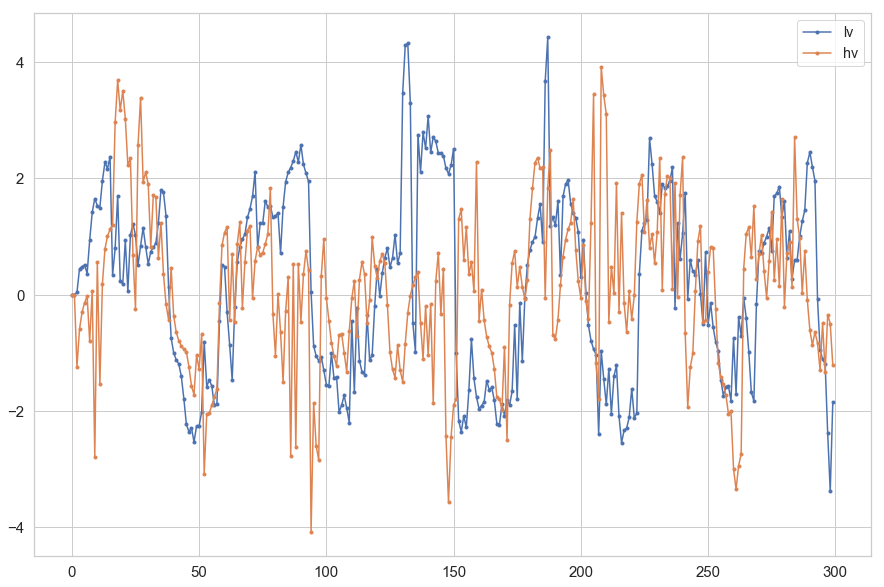

In [43]:
plt.plot(learning_signals_sorted.loc[(learning_signals_sorted.condition == 'lc') & (learning_signals_sorted.ID == 761), 'target_B'].values[0:300], '.-', label='lv')
plt.plot(learning_signals_sorted.loc[(learning_signals_sorted.condition == 'hc') & (learning_signals_sorted.ID == 761), 'target_B'].values[0:300], '.-',label='hv')
plt.legend()

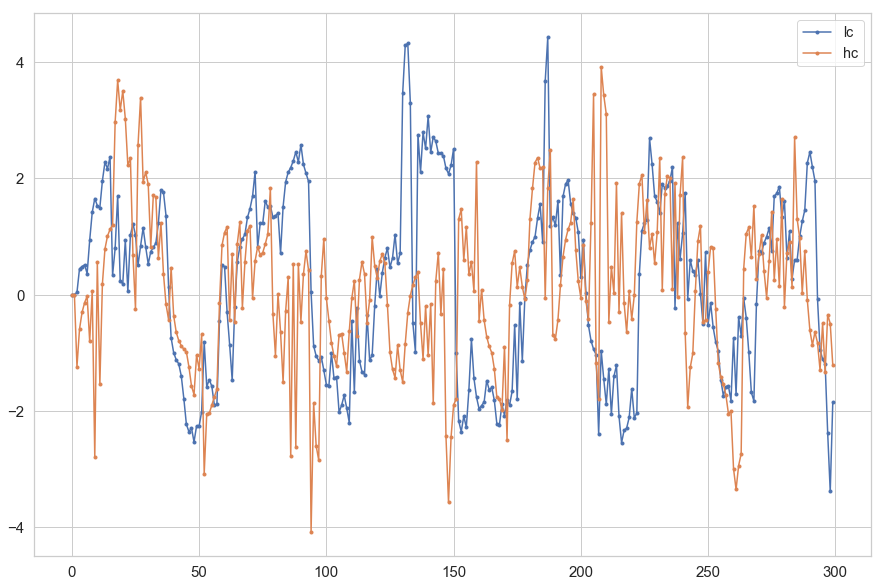

In [44]:
plt.plot(learning_signals_sorted.loc[(learning_signals_sorted.condition == 'lc') & (learning_signals_sorted.ID == 761), 'target_B'].values[0:300], '.-', label='lc')
plt.plot(learning_signals_sorted.loc[(learning_signals_sorted.condition == 'hc') & (learning_signals_sorted.ID == 761), 'target_B'].values[0:300], '.-', label='hc')
plt.legend()

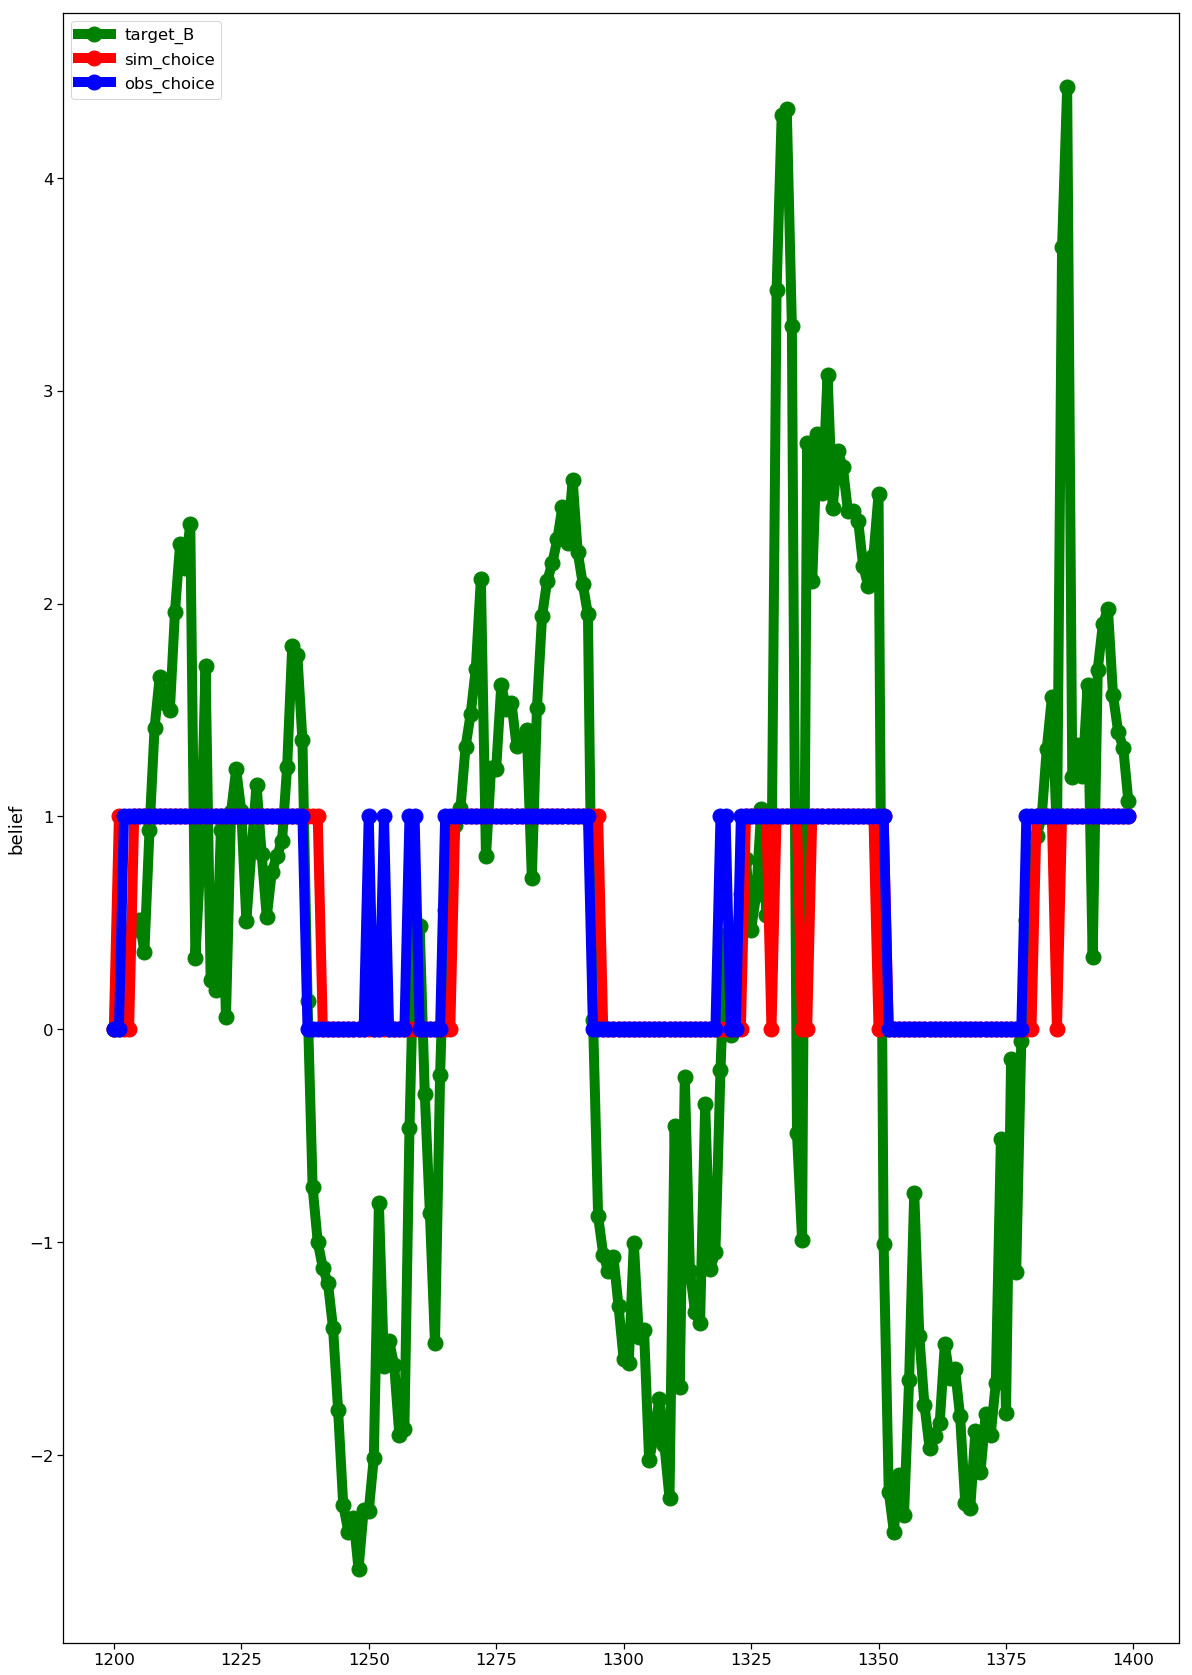

In [25]:
#make sure that the choice faces the same direction as the signed belief estimate 
#for simulated and real data 
plt.figure(figsize=(20,30))
plt.plot(learning_signals_sorted.target_B[1200:1400], 'g.-', label='target_B')
plt.plot(learning_signals_sorted.id_choices[1200:1400], 'r.-', label='sim_choice')

#need to subtract 111 to get 0/1 identity instead of ascii value 
plt.plot(obs_df_sorted.cue_choice[1200:1400] - 111, 'b.-', label='obs_choice')

plt.ylabel('belief')
plt.legend()

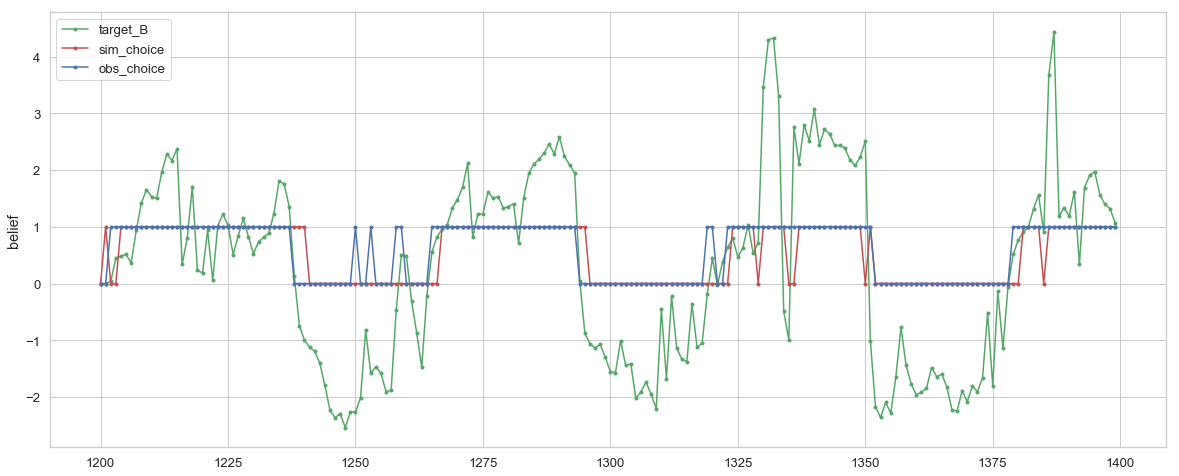

In [26]:
#make sure that the choice faces the same direction as the signed belief estimate 
#for simulated and real data 
plt.figure(figsize=(20,8))
plt.plot(sim_sample.target_B[0:200], 'g.-', label='target_B')
plt.plot(sim_sample.id_choices[0:200], 'r.-', label='sim_choice')

#need to subtract 111 to get 0/1 identity instead of ascii value 
plt.plot(obs_sample.cue_choice[0:200] - 111, 'b.-', label='obs_choice')

plt.ylabel('belief')
plt.legend()

In [27]:
conf_clrs = ['blue', 'red']
vol_clrs = ['forestgreen', 'purple']

In [28]:
conf_ls = learning_signals_sorted.loc[(learning_signals_sorted.condition == 'lc') | (learning_signals_sorted.condition == 'hc')]

vol_ls = learning_signals_sorted.loc[(learning_signals_sorted.condition == 'lv') | (learning_signals_sorted.condition == 'hv')]

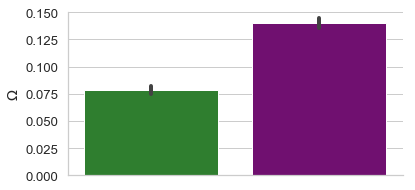

In [29]:
# plt.figure(figsize=(20,8))
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style='whitegrid')


# sns.set( font_scale=3,style='whitegrid')
b_plt=sns.barplot(x="condition",y="cpp", data=vol_ls, ci=95, n_boot=1000, units='ID', order=['lv', 'hv'], errwidth=4, palette=vol_clrs)
b_plt.set_xticklabels([''], rotation=0)
b_plt.set_xlabel('')
sns.despine()
plt.ylim([0,0.15])
# plt.ylabel('$B_{optimal} - B_{suboptimal}$')
plt.ylabel('$\Omega$')
plt.savefig('cpp_vol.pdf', dpi=600)

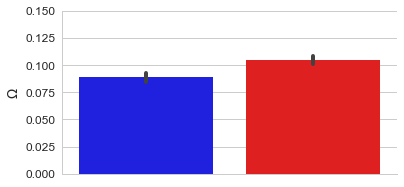

In [40]:
# plt.figure(figsize=(20,8))
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style='whitegrid')


# sns.set( font_scale=3,style='whitegrid')
b_plt=sns.barplot(x="condition",y="cpp", data=conf_ls, ci=95, n_boot=1000, units='ID', order=['lc', 'hc'], errwidth=4, palette=conf_clrs)
b_plt.set_xticklabels([''], rotation=0)
b_plt.set_xlabel('')
sns.despine()
plt.ylim([0,0.15])
# plt.ylabel('$B_{optimal} - B_{suboptimal}$')
plt.ylabel('$\Omega$')
plt.savefig('cpp_conflict.pdf', dpi=600)

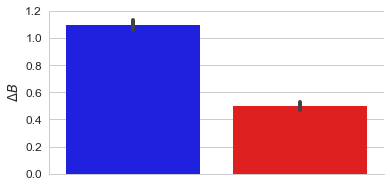

In [42]:
# plt.figure(figsize=(20,8))
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style='whitegrid')


# sns.set( font_scale=3,style='whitegrid')
b_plt=sns.barplot(x="condition",y="ideal_B", data=conf_ls, ci=95, n_boot=1000, units='ID', order=['lc', 'hc'], errwidth=4, palette=conf_clrs)
b_plt.set_xticklabels([''], rotation=0)
b_plt.set_xlabel('')
sns.despine()
plt.ylim([0,1.2])
# plt.ylabel('$B_{optimal} - B_{suboptimal}$')
plt.ylabel('$\Delta B$')
plt.savefig('B_conflict.pdf', dpi=600)

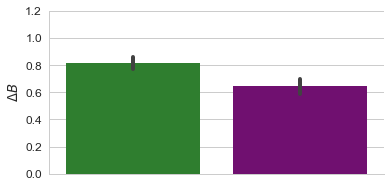

In [43]:

# plt.figure(figsize=(20,8))
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style='whitegrid')


# sns.set( font_scale=3,style='whitegrid')
b_plt=sns.barplot(x="condition",y="ideal_B", data=vol_ls, ci=95, n_boot=1000, units='ID', order=['lv', 'hv'], errwidth=4, palette=vol_clrs)
b_plt.set_xticklabels([''], rotation=0)
b_plt.set_xlabel('')
sns.despine()
plt.ylim([0,1.2])
# plt.ylabel('$B_{optimal} - B_{suboptimal}$')
plt.ylabel('$\Delta B$')
plt.savefig('B_vol.pdf', dpi=600)

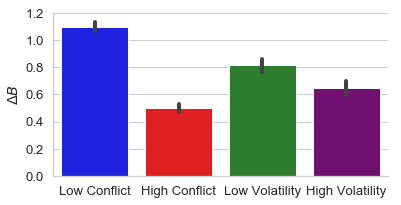

In [30]:
#b_ideal
#interaction effect 
clrs = ['blue', 'red', 'forestgreen', 'purple']

# plt.figure(figsize=(20,8))
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style='whitegrid')


# sns.set( font_scale=3,style='whitegrid')
b_plt=sns.barplot(x="condition",y="ideal_B", data=learning_signals_sorted, ci=95, n_boot=1000, units='ID', order=['lc', 'hc', 'lv', 'hv'], errwidth=4, palette=clrs)
b_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
b_plt.set_xlabel('')
sns.despine()
plt.ylim([0,1.2])
# plt.ylabel('$B_{optimal} - B_{suboptimal}$')
plt.ylabel('$\Delta B$')
plt.savefig('B_polished.pdf', dpi=600)

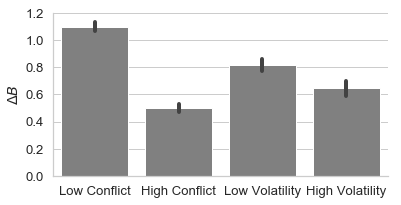

In [33]:
#b_ideal
#interaction effect 
clrs = ['blue', 'red', 'forestgreen', 'purple']

# plt.figure(figsize=(20,8))
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style='whitegrid')


# sns.set( font_scale=3,style='whitegrid')
b_plt=sns.barplot(x="condition",y="ideal_B", data=learning_signals_sorted, ci=95, n_boot=1000, units='ID', order=['lc', 'hc', 'lv', 'hv'], errwidth=4, color='gray')
b_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
b_plt.set_xlabel('')
sns.despine()
plt.ylim([0,1.2])
# plt.ylabel('$B_{optimal} - B_{suboptimal}$')
plt.ylabel('$\Delta B$')
plt.savefig('B_polished.pdf', dpi=600)

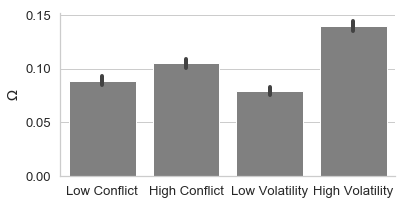

In [32]:
#b_ideal
#interaction effect 
# plt.figure(figsize=(20,8))
# sns.set( font_scale=3,style='whitegrid')
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style='whitegrid')
b_plt=sns.barplot(x="condition",y="cpp", data=learning_signals_sorted, ci=95, n_boot=1000, units='ID', order=['lc', 'hc', 'lv', 'hv'], errwidth=4, color='gray')
b_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
b_plt.set_xlabel('')
sns.despine()
# plt.ylim([0,1.2])
plt.ylabel('$\Omega$')
plt.savefig('cpp_polished.pdf', dpi=600)

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x="condition",y="flipped_gen_drift", data=learning_signals_sorted, ci=95, n_boot=1000)
plt.ylabel('drift-rate, $v$')

In [ ]:
#cpp 
plt.figure(figsize=(20,8))
sns.barplot(x="condition",y="cpp", data=learning_signals_sorted, ci=95, n_boot=1000, units='ID')
plt.ylabel('$\Omega$')

In [ ]:
#sim_sample simulation accuracy
plt.figure(figsize=(20,8))
plt.plot(sim_sample.p_id_accuracy, '.-', alpha = 0.7)
plt.plot(sim_sample.cp, '.-', color='k', alpha=0.5)

In [ ]:
#sim_sample simulation rt
plt.figure(figsize=(20,8))
plt.plot(sim_sample.rt, '.-', alpha = 0.7)
plt.plot(sim_sample.cp, '.-', color='k', alpha=0.5)

In [ ]:
#sim_sample simulation belief & drift-rate
plt.figure(figsize=(20,8))
plt.plot(obs_sample.rt, '.-', alpha = 0.7, label='rt')
plt.plot(sim_sample.cpp, '.-', alpha = 0.7, label='cpp')
# plt.plot(obs_sample.cp_with_slow_fast, '.-', color='k', alpha=0.5,label='cp')
plt.legend()

In [ ]:
#sim_sample simulation belief & drift-rate
plt.figure(figsize=(20,8))
plt.plot(sim_sample.target_B[0:100], '.-', alpha = 0.7, label='target_B')
plt.plot(sim_sample.gen_drift[0:100], '.-', alpha = 0.7, label='drift-rate')
plt.plot(sim_sample.cp[0:100], '.-', color='k', alpha=0.5,label='cp')
plt.legend()

In [ ]:
#sim_sample simulation cpp & bound
plt.figure(figsize=(20,8))
plt.plot(sim_sample.cpp[0:200], '.-', alpha = 0.7, label='cpp')
plt.plot(sim_sample.gen_bound[0:200], '.-', alpha = 0.7, label='a')
plt.plot(sim_sample.cp[0:200], '.-', color='k', alpha=0.5, label='cp')
plt.legend()

plt.figure(figsize=(20,8))
plt.plot(sim_sample.cpp[0:200], '.-', alpha = 0.7, label='cpp')
plt.plot(sim_sample.rt[0:200], '.-', alpha = 0.7, label='rt')
plt.plot(sim_sample.cp[0:200], '.-', color='k', alpha=0.5, label='cp')
plt.legend()

In [ ]:
# #write the sim data to csv with new variables (ideal_B ... )
# learning_signals_sorted.to_csv(write_dir+'probC_sim_learning_signals_processed.csv', index=False)

In [ ]:
#drop the simulated acc & rt columns
learning_signals_sorted.drop('p_id_accuracy', axis=1, inplace=True)
learning_signals_sorted.drop('rt', axis=1, inplace=True)
learning_signals_sorted.drop('id_choices', axis=1, inplace=True)
learning_signals_sorted.drop('correct_id_choices', axis=1, inplace=True)
learning_signals_sorted.drop('trial', axis=1, inplace=True)

learning_signals_sorted.head()

In [ ]:
len(obs_df_sorted) == n_participants*n_clean_trials*n_conditions, len(learning_signals_sorted) == n_participants*n_clean_trials*n_conditions

In [ ]:
obs_df_sorted.isna().values.any()

In [ ]:
obs_df_sorted['cpp'] = learning_signals_sorted.cpp
obs_df_sorted['ideal_B'] = learning_signals_sorted.ideal_B
obs_df_sorted['target_B'] = learning_signals_sorted.target_B

In [ ]:
obs_df_sorted.to_csv(write_dir+'combined_learning_sig_obs_data.csv', index=False)